In [2]:
#pip install --upgrade tensorflow

In [640]:
from tensorflow.keras.models import load_model
model = load_model('/content/mnist_model.h5')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 400)                 │         200,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │         120,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │          60,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 773,400 (2.95 MB)

 Trainable params: 773,400 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

In [641]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
X_finetune = np.load('/content/finetune_images_mnist.npy')
y_finetune = np.load('/content/finetune_labels_mnist.npy')
X_valid = np.load('/content/valid_images_mnist.npy')
y_valid = np.load('/content/valid_labels_mnist.npy')
X_test = np.load('/content/test_images_mnist.npy')
y_test = np.load('/content/test_labels_mnist.npy')
print(X_finetune.shape, y_finetune.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [642]:
import sklearn
from sklearn.manifold import TSNE
print(f"""
LAYER 1: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 28*28)))[0], y_test)},
LAYER 2: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 28*28)))[1], y_test)},
LAYER 3: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 28*28)))[2], y_test)},
LAYER 4: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 28*28)))[3], y_test)}
      """)


LAYER 1: 3.360205890309642,
LAYER 2: 3.3395003204719904,
LAYER 3: 3.2872596941279233,
LAYER 4: 3.264590164690484
      


In [643]:
from keras.models import Model
from keras.layers import Dense

num_classes = 10
softmax_layer = Dense(num_classes, activation='softmax', name='softmax_layer')(model.output[3])
final_model = Model(inputs=model.input, outputs=softmax_layer)
final_model.summary()

Model: "functional_187"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 400)                 │         200,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │         120,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_layer (Dense)                │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 775,410 (2.96 MB)

 Trainable params: 775,410 (2.96 MB)

 Non-trainable params: 0 (0.00 B)

In [644]:
final_model.layers[0].trainable = True
final_model.layers[1].trainable = True
final_model.layers[2].trainable = True
final_model.layers[3].trainable = True
final_model.layers[4].trainable = True
for layer in final_model.layers:
    print(f"Layer Name: {layer.name}, Trainable: {layer.trainable}")

Layer Name: input_layer, Trainable: True
Layer Name: dense, Trainable: True
Layer Name: dense_1, Trainable: True
Layer Name: dense_2, Trainable: True
Layer Name: dense_3, Trainable: True
Layer Name: softmax_layer, Trainable: True


In [645]:
initial_learning_rate = 0.0005
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=50,
    decay_rate=0.95,
    staircase=False)
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

In [646]:
selected_samples = X_finetune.reshape((-1, 28*28))
selected_labels = tf.keras.utils.to_categorical(y_finetune, num_classes=10)

In [647]:
images_valid = X_valid.reshape((-1, 28*28))
labels_valid = tf.keras.utils.to_categorical(y_valid, num_classes=10)

In [648]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)
history_finetune = final_model.fit(
    selected_samples[:500],
    selected_labels[:500],
    epochs=50,
    batch_size=128,
    validation_data=(images_valid, labels_valid),
    #callbacks=[early_stopping]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 612ms/step - accuracy: 0.1812 - loss: 401.0293 - val_accuracy: 0.2642 - val_loss: 396.5493
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.3256 - loss: 394.4557 - val_accuracy: 0.4226 - val_loss: 384.1972
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.4829 - loss: 380.7533 - val_accuracy: 0.5416 - val_loss: 372.3797
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5592 - loss: 370.6041 - val_accuracy: 0.6766 - val_loss: 363.9886
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.7409 - loss: 361.9421 - val_accuracy: 0.6950 - val_loss: 356.1125
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.7998 - loss: 354.0023 - val_accuracy: 0.7466 - val_loss: 348.3799
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.8731 - loss: 346.2665 - val_accuracy: 0.8098 - val_loss: 340.8063
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.9318 - loss: 338.7835 - va

In [649]:
y_test_selected = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(final_model.evaluate(X_test.reshape((-1, 28*28)), y_test_selected))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8306 - loss: 163.4173
[163.3392333984375, 0.8504999876022339]


In [650]:
val_acc_finetune = history_finetune.history['val_accuracy']

number of epochs:50


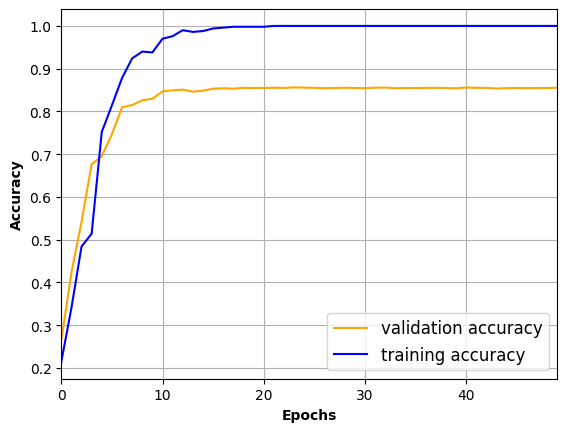

In [651]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_accuracy'], color = 'orange', label = 'validation accuracy')
plt.plot(np.arange(0,epochs), history_finetune.history['accuracy'], color = 'blue', label = 'training accuracy')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.grid()
plt.legend(loc='lower right', fontsize=12)

number of epochs:50


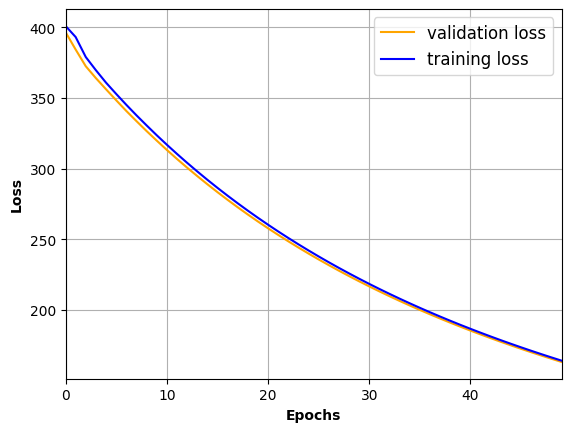

In [652]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_loss'], color = 'orange', label = 'validation loss')
plt.plot(np.arange(0,epochs), history_finetune.history['loss'], color = 'blue', label = 'training loss')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Loss', fontweight = 'bold')
plt.grid()
plt.legend(loc='upper right', fontsize=12)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


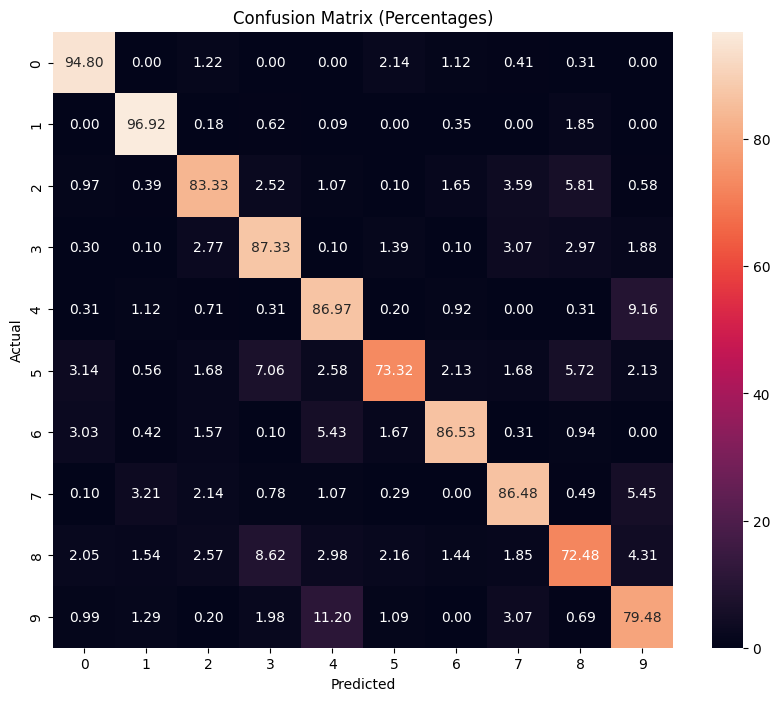

In [653]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

logits = final_model.predict(X_test.reshape((-1, 28*28)))
predicted_labels = np.argmax(logits, axis=-1)

cf_matrix = confusion_matrix(y_test, predicted_labels)

cf_matrix_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

cf_matrix_percent = cf_matrix_normalized * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix_percent, annot=True, fmt=".2f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [654]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test.reshape((-1, 28*28)))
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       980
           1       0.93      0.97      0.95      1135
           2       0.87      0.83      0.85      1032
           3       0.81      0.87      0.84      1010
           4       0.78      0.87      0.82       982
           5       0.88      0.73      0.80       892
           6       0.92      0.87      0.89       958
           7       0.86      0.86      0.86      1028
           8       0.79      0.72      0.76       974
           9       0.78      0.79      0.79      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Baseline

In [655]:
def create_model():
    inputs = keras.layers.Input(shape=(28*28,))
    layer1 = keras.layers.Dense(500, activation='selu',
                                kernel_initializer = 'glorot_uniform' , kernel_regularizer = tf.keras.regularizers.L2(0.1))(inputs)
    layer2 = keras.layers.Dense(400, activation='selu',
                                kernel_initializer = 'glorot_uniform', kernel_regularizer = tf.keras.regularizers.L2(0.1))(layer1)
    layer3 = keras.layers.Dense(300, activation='selu',
                                kernel_initializer = 'glorot_uniform', kernel_regularizer = tf.keras.regularizers.L2(0.1))(layer2)
    layer4 = keras.layers.Dense(200, activation='selu',
                                kernel_initializer = 'glorot_uniform', kernel_regularizer = tf.keras.regularizers.L2(0.1))(layer3)
    model = keras.models.Model(inputs=inputs, outputs=[layer1, layer2, layer3, layer4])
    return model
model_ = create_model()
num_classes = 10
softmax_layer = Dense(num_classes, activation='softmax', name='softmax_layer')(model_.output[3])
final_model = Model(inputs=model_.input, outputs=softmax_layer)
final_model.summary()

Model: "functional_191"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 400)                 │         200,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 300)                 │         120,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_layer (Dense)                │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 775,410 (2.96 MB)

 Trainable params: 775,410 (2.96 MB)

 Non-trainable params: 0 (0.00 B)

In [656]:
initial_learning_rate = 0.0005
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=50,
    decay_rate=0.95,
    staircase=False)
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

In [657]:
selected_samples = X_finetune.reshape((-1, 28*28))
selected_labels = tf.keras.utils.to_categorical(y_finetune, num_classes=10)

In [658]:
images_valid = X_valid.reshape((-1, 28*28))
labels_valid = tf.keras.utils.to_categorical(y_valid, num_classes=10)

In [659]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)
history_finetune = final_model.fit(
    selected_samples[:500],
    selected_labels[:500],
    epochs=50,
    batch_size=128,
    validation_data=(images_valid, labels_valid),
    #callbacks=[early_stopping]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.1644 - loss: 223.0285 - val_accuracy: 0.4060 - val_loss: 188.0416
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.5315 - loss: 177.5998 - val_accuracy: 0.4840 - val_loss: 169.3255
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.6384 - loss: 162.8522 - val_accuracy: 0.6222 - val_loss: 161.0538
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.8118 - loss: 155.5250 - val_accuracy: 0.6558 - val_loss: 156.7950
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.9028 - loss: 151.1339 - val_accuracy: 0.7026 - val_loss: 152.4267
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.9574 - loss: 147.6220 - val_accuracy: 0.7324 - val_loss: 148.7480
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.9821 - loss: 144.4841 - val_accuracy: 0.7408 - val_loss: 145.8086
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.9905 - loss: 141.4118 - va

In [660]:
y_test_selected = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(final_model.evaluate(X_test.reshape((-1, 28*28)), y_test_selected))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7223 - loss: 70.1268
[69.80857849121094, 0.7547000050544739]


In [661]:
val_acc_baseline = history_finetune.history['val_accuracy']

number of epochs:50


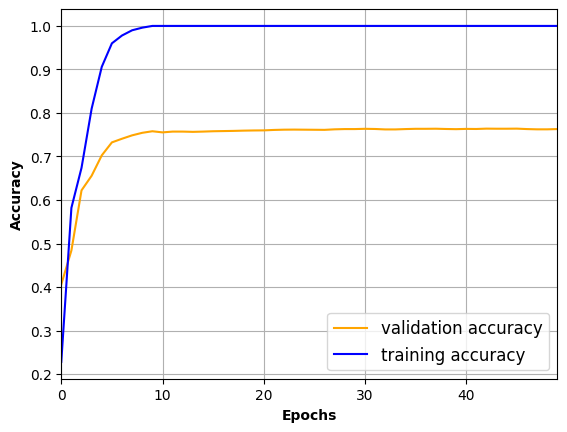

In [662]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_accuracy'], color = 'orange', label = 'validation accuracy')
plt.plot(np.arange(0,epochs), history_finetune.history['accuracy'], color = 'blue', label = 'training accuracy')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.grid()
plt.legend(loc='lower right', fontsize=12)

number of epochs:50


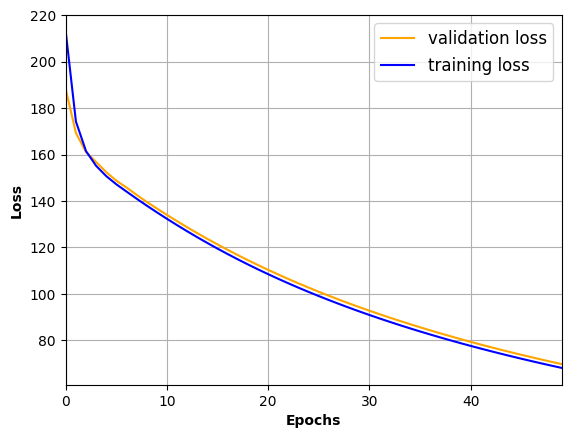

In [663]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_loss'], color = 'orange', label = 'validation loss')
plt.plot(np.arange(0,epochs), history_finetune.history['loss'], color = 'blue', label = 'training loss')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Loss', fontweight = 'bold')
plt.grid()
plt.legend(loc='upper right', fontsize=12)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


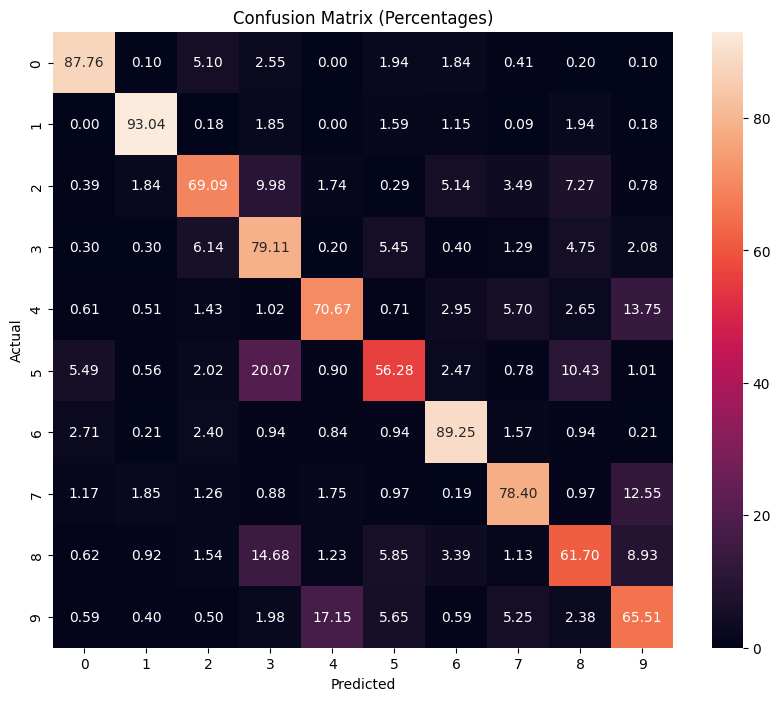

In [664]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

logits = final_model.predict(X_test.reshape((-1, 28*28)))
predicted_labels = np.argmax(logits, axis=-1)

cf_matrix = confusion_matrix(y_test, predicted_labels)

cf_matrix_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

cf_matrix_percent = cf_matrix_normalized * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix_percent, annot=True, fmt=".2f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [665]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test.reshape((-1, 28*28)))
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       980
           1       0.94      0.93      0.94      1135
           2       0.78      0.69      0.73      1032
           3       0.61      0.79      0.69      1010
           4       0.74      0.71      0.72       982
           5       0.68      0.56      0.62       892
           6       0.83      0.89      0.86       958
           7       0.80      0.78      0.79      1028
           8       0.66      0.62      0.64       974
           9       0.63      0.66      0.64      1009

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



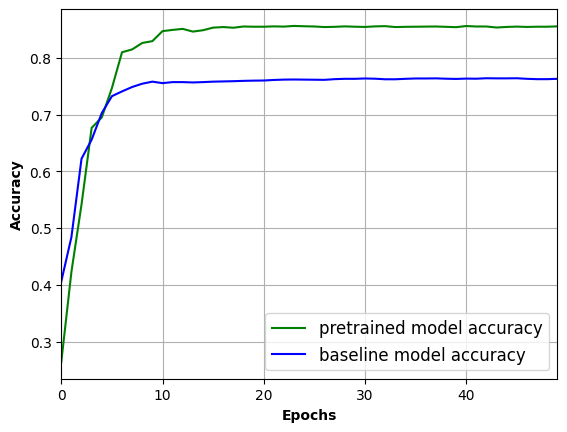

In [667]:
plt.plot(np.arange(0,50), val_acc_finetune, color = 'green', label = 'pretrained model accuracy')
plt.plot(np.arange(0,50), val_acc_baseline, color = 'blue', label = 'baseline model accuracy')
plt.xlim(0, 50 - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.grid()
plt.legend(loc='lower right', fontsize=12)